In [61]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
from datetime import datetime 
%matplotlib inline

This website had the historial S&P500 Returns 

https://www.slickcharts.com/sp500/returns#google_vignette

In [62]:
#Data was saved on file and i used the read_csv to grab data to run analysis

In [63]:
sp500_path = Path("S&P500 returns.csv")

In [64]:
sp500_return = pd.read_csv(Path("S&P500 returns.csv"))
sp500_return

,Year,Return
0,2021,28.71
1,2020,18.40
2,2019,31.49
3,2018,-4.38
4,2017,21.83
...,...,...
91,1930,-24.90
92,1929,-8.42
93,1928,43.61
94,1927,37.49


In [65]:
# I set the index for the inflation data as "Year"

sp500_return = sp500_return.set_index("Year")
sp500_return.index

Int64Index([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
            2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
            1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
            1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
            1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
            1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
            1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,
            1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934,
            1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926],
           dtype='int64', name='Year')

In [66]:
sp500_return.head()

,Return
Year,
2021,28.71
2020,18.40
2019,31.49
2018,-4.38
2017,21.83


In [67]:
# Here I rename the Return column to Annual to clearly provide timeframe being used 
sp500_return.rename(columns = {'Return':'Annual_sp500Return'}, inplace = True)
sp500_return

,Annual_sp500Return
Year,
2021,28.71
2020,18.40
2019,31.49
2018,-4.38
2017,21.83
...,...
1930,-24.90
1929,-8.42
1928,43.61


In [68]:
# Here i plot the s&p500 return data set 

sp500_return["Annual_sp500Return"].hvplot(
    label="Annual Return",
    xlabel="Year",
    ylabel="sp500 Return"
)

:Curve   [Year]   (Annual_sp500Return)

In [69]:
seventies_return_df = sp500_return.rename(columns = {'Annual_sp500Return':'seventies_return'})
seventies_return_df = seventies_return_df["seventies_return"].iloc[43:56]
seventies_return_df

Year
1978     6.56
1977    -7.18
1976    23.84
1975    37.20
1974   -26.47
1973   -14.66
1972    18.98
1971    14.31
1970     4.01
1969    -8.50
1968    11.06
1967    23.98
1966   -10.06
Name: seventies_return, dtype: float64

In [70]:
# Here i plot the seventies return of the s&p500 return data set 

seventies_return_df.hvplot(
    label="Seventies Return",
    xlabel="Year",
    ylabel="sp500 Return"
)

:Curve   [Year]   (seventies_return)

In [71]:
# Here i plot the 2010 onward return of the s&p500 return data set 

twenties_return_df = sp500_return.rename(columns = {'Annual_sp500Return':'twenties_return'})
twenties_return_df = twenties_return_df.iloc[1:12]

In [72]:
twenties_return_df.hvplot(
    label="Twenties_return",
    xlabel="Year",
    ylabel="sp500 Return"
)

:Curve   [Year]   (twenties_return)

In [73]:
#here i read the inflation dataset 

inflation_data = pd.read_csv("inflation_data.csv", index_col=0)
inflation_data.head()

,seventies_inflation,twenties_inflation
Year,,
1966,3.3,NaN
1967,3.5,NaN
1968,2.5,NaN
1969,3.3,NaN
1970,3.4,NaN


In [79]:
#here i compare both the inflation and s&p500 seventies and twenties returns 

comparison = pd.concat([seventies_return_df, twenties_return_df, inflation_data], axis=1)
comparison

,seventies_return,twenties_return,seventies_inflation,twenties_inflation
Year,,,,
1966,-10.06,NaN,3.3,NaN
1967,23.98,NaN,3.5,NaN
1968,11.06,NaN,2.5,NaN
1969,-8.50,NaN,3.3,NaN
1970,4.01,NaN,3.4,NaN
1971,14.31,NaN,6.1,NaN
1972,18.98,NaN,6.0,NaN
1973,-14.66,NaN,9.1,NaN
1974,-26.47,NaN,15.4,NaN


<AxesSubplot:title={'center':'Comparison of Inflation and S&P 500 Returns'}, xlabel='Year'>

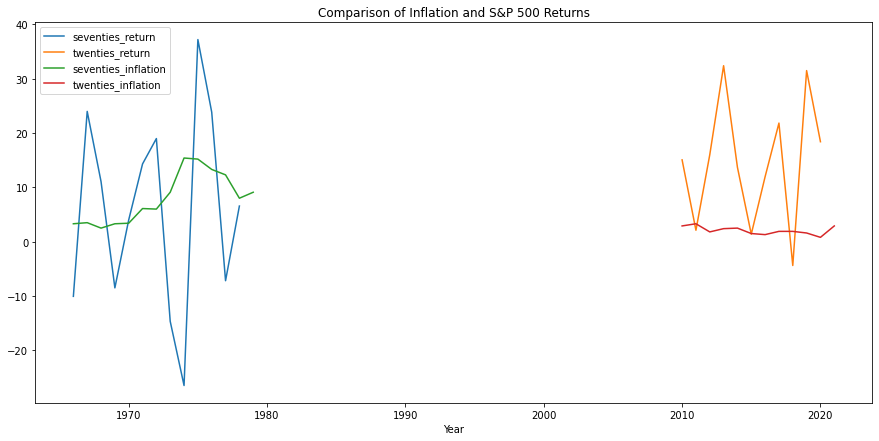

In [83]:
#here i plot a comparison graph of both in one plot

comparison.plot(figsize=(15,7), title ="Comparison of Inflation and S&P 500 Returns")

In [58]:
seventies = comparison.iloc[:,[0,2]].dropna()
twenties = comparison.iloc[:,[1,3]].dropna()

In [59]:
#here i plot the line graph showing returns in the seventies along side inflation at the same time

seventies.hvplot()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [60]:
#here i plot the line graph showing returns in the twenties along side inflation at the same time

twenties.hvplot()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)